# Covid-19 data analysis

This jupyter notebook is divided into two sets of analysis: 

i) Visualises the Covid-19 cases in London

ii) Compares the Covid-19 cases across 5 countries

##  Section 1: Covid-19 cases in London

In [2]:
#load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io
%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np

In [3]:
#Loading the data collected from London Datastore and saved locally on computer
london_borough = pd.read_csv("phe_cases_london_boroughs.csv")

In [4]:
#Checking data
london_borough

,area_code,area_name,date,new_cases,total_cases
0,E09000001,City of London,2020-01-30,0,0
1,E09000002,Barking and Dagenham,2020-01-30,0,0
2,E09000003,Barnet,2020-01-30,0,0
3,E09000004,Bexley,2020-01-30,0,0
4,E09000005,Brent,2020-01-30,0,0
...,...,...,...,...,...
4285,E09000029,Sutton,2020-06-07,0,756
4286,E09000030,Tower Hamlets,2020-06-07,0,635
4287,E09000031,Waltham Forest,2020-06-07,0,771
4288,E09000032,Wandsworth,2020-06-07,0,1001


In [7]:
#Getting to understand a bit more of the data
print(london_borough.shape)
print("")
print(london_borough.info())
print("")
print(london_borough.describe())

(4290, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4290 entries, 0 to 4289
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area_code    4290 non-null   object
 1   area_name    4290 non-null   object
 2   date         4290 non-null   object
 3   new_cases    4290 non-null   int64 
 4   total_cases  4290 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 167.7+ KB
None

         new_cases  total_cases
count  4290.000000  4290.000000
mean      6.326107   394.158741
std      10.011730   412.562473
min       0.000000     0.000000
25%       0.000000     1.000000
50%       1.000000   314.000000
75%       9.000000   675.750000
max      80.000000  1515.000000


In [13]:
#Grouping the data according to the area_name and aggregating total cases by area_name
top_categories = london_borough.groupby('area_name').aggregate(sum)./
                                sort_values('total_cases', ascending=False)./
                                drop("new_cases", axis=1).reset_index()


#checking grouped data
top_categories

,area_name,total_cases
0,Croydon,93447
1,Brent,93043
2,Barnet,83142
3,Southwark,82771
4,Lambeth,79014
5,Bromley,75352
6,Ealing,72982
7,Wandsworth,65154
8,Newham,63672
9,Harrow,63484


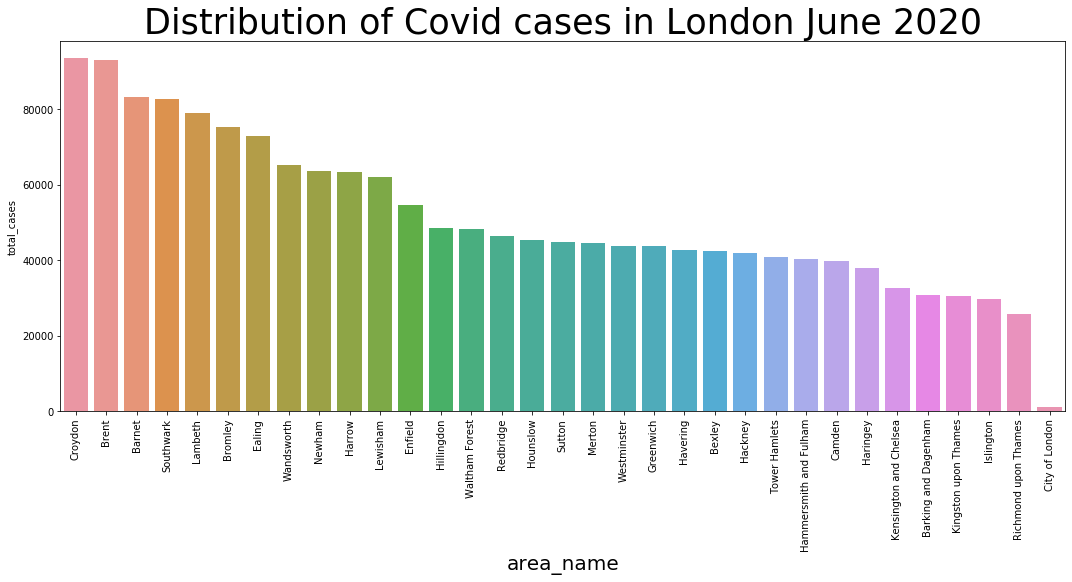

In [14]:
#visualising results using a histogram

#creating image size 
plt.figure(figsize = (18,15))

#creating x axes  
g1 = plt.subplot(211)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_xlabel(xlabel= "London Boroughs",fontsize=20)


#g1.set_ylabel(ylabel= "London Boroughs",fontsize=20)
plt.ylabel(ylabel ="Toal cases", fontsize=20)
plt.xlabel()
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')
#setting title 
plt.title("Distribution of Covid cases in London June 2020", fontsize=35)

#creating seaborn plot
sns.barplot(data=top_categories, x ='area_name', y= 'total_cases')

In [15]:
import geopandas as gpd

# set the filepath and load in a shapefile
fp = "Data/London_Ward_CityMerged.shp"

map_df = gpd.read_file(fp)
print(map_df)

                       NAME   GSS_CODE                               DISTRICT  \
0         Chessington South  E05000405                   Kingston upon Thames   
1    Tolworth and Hook Rise  E05000414                   Kingston upon Thames   
2                Berrylands  E05000401                   Kingston upon Thames   
3                 Alexandra  E05000400                   Kingston upon Thames   
4                  Beverley  E05000402                   Kingston upon Thames   
..                      ...        ...                                    ...   
628               Whalebone  E05000042                   Barking and Dagenham   
629               Eastbrook  E05000030                   Barking and Dagenham   
630          Chadwell Heath  E05000029                   Barking and Dagenham   
631                Parsloes  E05000037                   Barking and Dagenham   
632          Castle Baynard  E05009297  City and County of the City of London   

     LAGSSCODE  HECTARES  N

In [17]:
# check data type
map_df.head()

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16..."


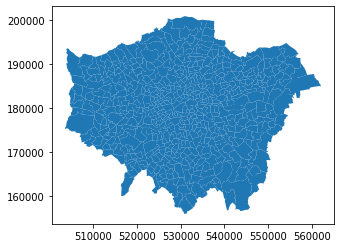

In [16]:
#preview of what the map looks like with no data in it
map_df.plot()

In [18]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('DISTRICT').join(top_categories.set_index('area_name'))

merged.head()


,NAME,GSS_CODE,LAGSSCODE,HECTARES,NONLD_AREA,geometry,total_cases
Barking and Dagenham,Gascoigne,E05000032,E09000002,113.874,4.906,"POLYGON ((543574.498 183951.404, 543571.702 18...",30721.0
Barking and Dagenham,Thames,E05000039,E09000002,788.848,120.125,"POLYGON ((545802.000 181308.800, 545798.397 18...",30721.0
Barking and Dagenham,River,E05000038,E09000002,354.369,41.464,"POLYGON ((549072.799 183605.103, 549074.102 18...",30721.0
Barking and Dagenham,Village,E05000041,E09000002,214.748,0.000,"POLYGON ((549049.301 184708.297, 549070.202 18...",30721.0
Barking and Dagenham,Abbey,E05000026,E09000002,128.292,2.655,"POLYGON ((544735.196 184076.498, 544726.596 18...",30721.0


In [19]:
#checking to see the data merged properly by checking the unique boroughs
merged.index.unique()

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City and County of the City of London',
       'City of Westminster', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth'],
      dtype='object')

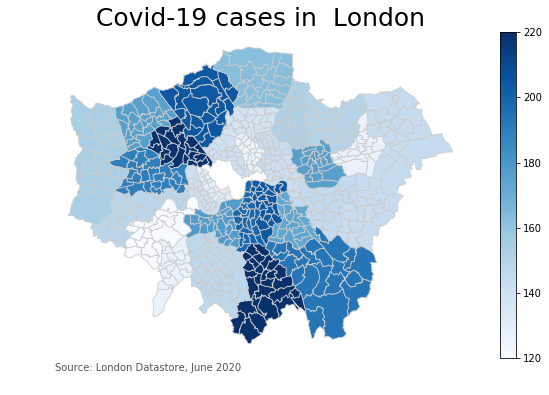

In [21]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'total_cases'

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Covid-19 cases in  London',\
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, June 2020',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

## Section 2- Covid-19 Cases Country Comparisons

In [31]:
# Section 2 - Loading and Selecting Data
# Data is continuously being updated from this site
raw_df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

# Selecting only a few countries for easy visualisation
countries = ['Brazil', 'India', 'United Kingdom', 'US', 'Russia', 'China']
df = raw_df[raw_df['Country'].isin(countries)]

# Creating a total cases summary column
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

<ipython-input-31-c880bf90b043>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)


In [23]:
# Checking the original data
raw_df.sort_values("Deaths", ascending = False)

,Date,Country,Confirmed,Recovered,Deaths
29126,2020-06-24,US,2381361,656161,121979
28938,2020-06-23,US,2347022,647548,121228
28750,2020-06-22,US,2312302,640198,120402
28562,2020-06-21,US,2281655,622133,119979
28374,2020-06-20,US,2255297,617460,119720
...,...,...,...,...,...
7885,2020-03-03,United Arab Emirates,27,5,0
7884,2020-03-03,Ukraine,1,0,0
7883,2020-03-03,Uganda,0,0,0
19317,2020-05-03,Rwanda,259,124,0


In [26]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
23,2020-01-22,Brazil,0,0,0,0
36,2020-01-22,China,548,28,17,593
79,2020-01-22,India,0,0,0,0
140,2020-01-22,Russia,0,0,0,0
174,2020-01-22,US,1,0,0,1


In [32]:
# Grouping the data accorging to country
df = df.pivot(index='Date', columns='Country', values='Total Cases')

# Setting Date as the Index 
df_covid = df.reset_index('Date')
df_covid.set_index("Date", inplace= True)

In [33]:
# Checking the countries included in the table
df_covid.columns

Index(['Brazil', 'China', 'India', 'Russia', 'US', 'United Kingdom'], dtype='object', name='Country')

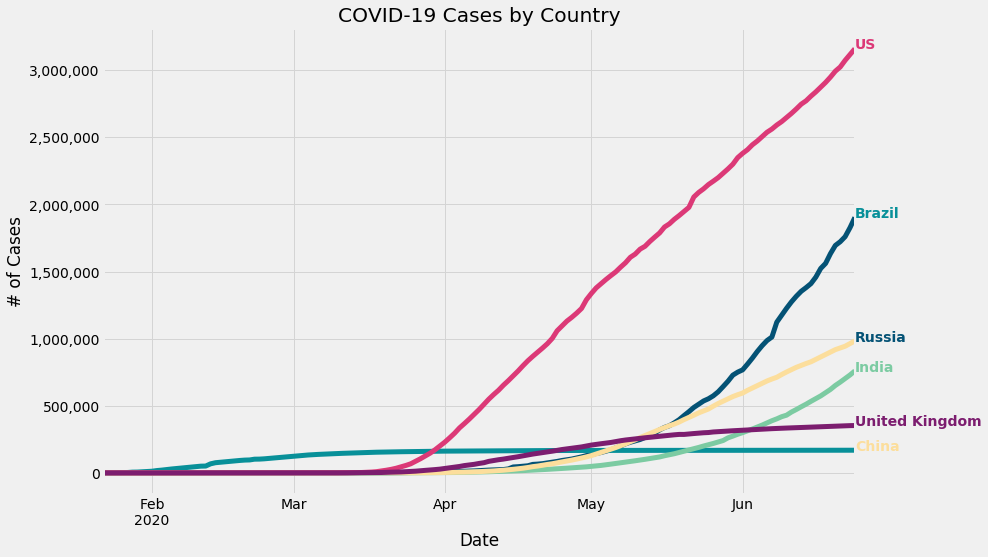

In [34]:
# Generating colours and style for graph 
colors = {'Russia':'#045275', 'Brazil':'#089099', 'India':'#7CCBA2', 'China':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Creating the Visualization
plot = df_covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')
plt.title('COVID-19 Cases by Country')

# Assigning Colour
for country in list(colors.keys()):
    plot.text(x = df_covid.index[-1], y = df_covid[country].max(), color = colors[country], s = country, weight = 'bold')

## Section 2 - COVID-19 RATES PER 1,000,000

In [35]:
#Calculating Rates per 1,000,000
populations = {'Russia':14447800, 'Brazil': 209469300 , 'United Kingdom': 67802690 , 'US': 330548815, 'India': 1352617000, 'China':1392730000}
percapita = df_covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*1000000

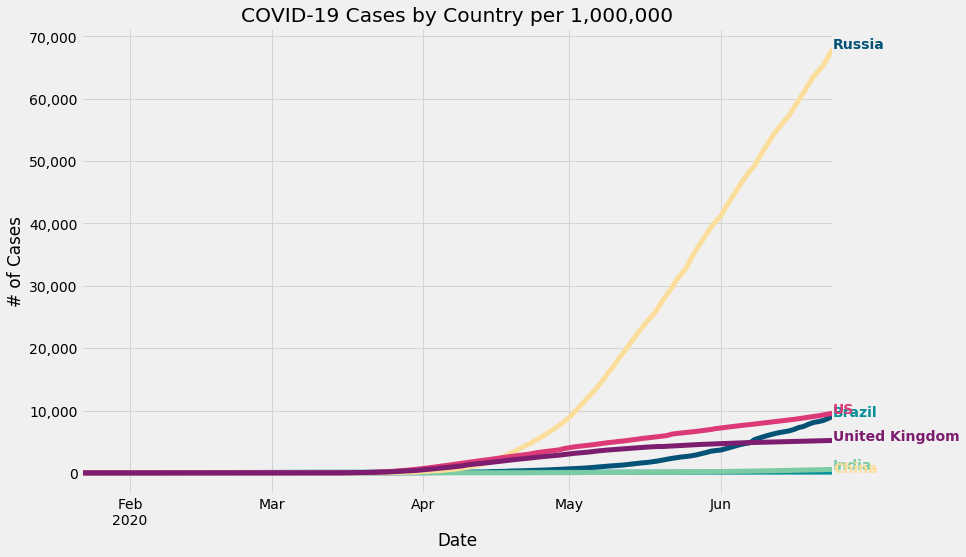

In [36]:
# Generating Colours and Style
colors = {'Russia':'#045275', 'Brazil':'#089099', 'India':'#7CCBA2', 'China':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Creating the Visualization
plot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')
plt.title('COVID-19 Cases by Country per 1,000,000')

# Assigning Colour
for country in list(colors.keys()):
    plot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')